## Ejercio práctico No. 2

Queridos estudiantes, estamos cerca de cerrar la semana No.2, Felicitaciones!

Para efectivamente realizar el cierre necesitamos aplicar el conocimiento adquirido en la presente unidad por lo que a continuación, les presento una base de datos para que obtengan su modelo de regresión logística simple. En la práctica, la regresión multinomial es menos frecuente y en las empresas por lo general encontraremos variables obetivos con dos niveles.


La base con la que trabajaremos en este ejercicio práctico contiene información bancaria de clientes y de campañas de marketing de un banco de Portugal.
Las campañas realizadas se basaron en su mayoría en llamadas telefónicas directas, ofreciendo al cliente del banco realizar un depósito a plazo. Si después de todos los esfuerzos de marketing, el cliente ha accedido a realizar el depósito: la variable de destino fue marcada como 'sí'; de lo contrario, 'no'

- edad
- tipo de trabajo
- esatdo civil
- educación
- si el cliente entró en no pago o tiene un crédito en default
- vivienda propia
- si el cliente posee un préstamo , entre otras


Es una base que tiene un puntaje de 10/10 en usabilidad, lo que nos indica que es adecuada para el uso de estudiantes y principiantes dado que no tiene grandes problemas en sus datos.

In [228]:
import pandas as pd
import seaborn as sns
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.special import factorial
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip


from scipy.stats import norm
from math import sqrt
import math
import numpy as np
from scipy.stats import kstest
from scipy.stats import lognorm

La locación remota de la base de datos se encuentra en Kaggle en el siguiente link:
    https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset
    
Adicionalmente también lo pueden descargar de la interfaz del estudiante.

# Descripción de los puntos a realizar:

### 1. Importe la base de datos una base al Jupyter Notebook con pandas

In [229]:
df = pd.read_csv("/media/henryx/alldata/Maestri/maestria/analisis_predictivo/s2/bank-additional-full.csv", sep= ";")
print(df.size)
print(df.shape)
df

864948
(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### 2. Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que les llame la atención?

Podemos 
cat_field=[i.values for i in df.dtypes if i is np.dtype('object') ] 
cat_field


In [230]:

print(df.columns)
print(df.describe())
print(df.dtypes)


df.dtypes

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

  

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

podeasd..

In [231]:
df[df.columns[1]].dtypes is np.dtype(object)
cat_field=[i for i in df.columns if df[i].dtypes is np.dtype(object) ] 
quan_field=[i for i in df.columns if df[i].dtypes is not np.dtype(object) ] 
print("lista de variables categoricas " + str(cat_field) )
print("lista de variables cuantitativas  "+ str(quan_field))

lista de variables categoricas ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
lista de variables cuantitativas  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


### 3. Evalúe si la base contiene datos perdidos. ¿Son efecivamente datos perdidos? 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


<AxesSubplot:>

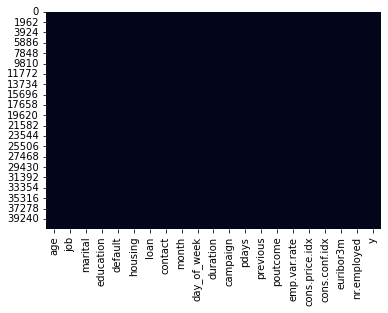

In [232]:
print(df.isnull().sum())

# la base si contiene datos perdidos en total 26. 
sns.heatmap(df.isnull(), cbar=False)

Aparentemente lo existen datos nulos, si envargo econtramos datos tipeados como 'unknown'. 

<AxesSubplot:>

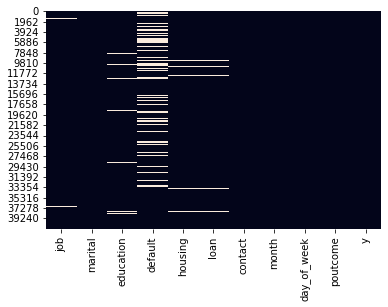

In [233]:

sns.heatmap(df[cat_field] == 'unknown' , cbar=False)

In [234]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

Se puede apreciar que si existe un gran cantidad de valores 'unkown' es especial en la varible 'default'. Como el nuero de valores 'unkown' es representativo no tomare encuenta esta variable. 

### 4. Evalúe si alguna de las variables contiene datos atípicos (outliers). 
- De ser el caso detalle cuáles y qué método estadístico aplicarán para corregir

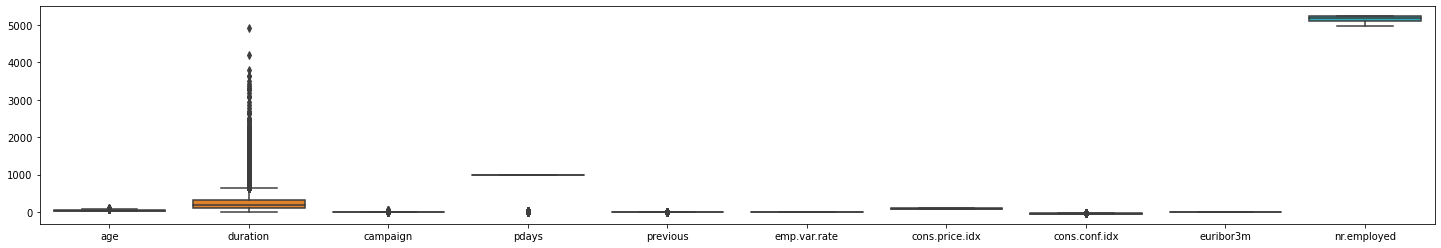

In [235]:
plt.figure(figsize=(25,4))
sns.boxplot(data= df[quan_field] ) 
plt.show()

Efectivamente si existe valor atípicos lo en especial en la variable 'duración' como son un número representativo no podemos eliminarlos y reemplazar por un estimador como la media o la mediana podría traer errores al modelo de predicción por esta razon tambien retiro de nuestro estudio a la variable "duration"

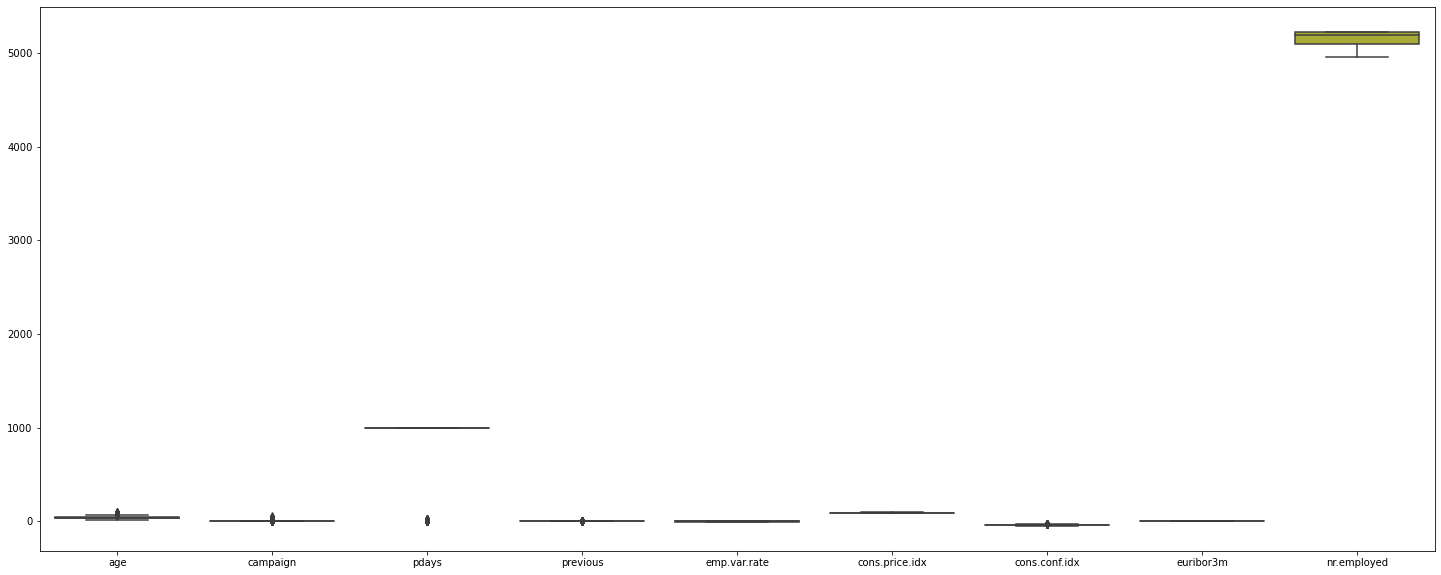

In [236]:
quan_field.remove('duration') if 'duration' in quan_field else None
df= df.drop(columns= 'duration')
plt.figure(figsize=(25,10))
sns.boxplot(data= df[quan_field] ) 
plt.show()


Se pude observar que tambien existen valores atipicos en la variable 'pdays'. Segun el dictionary pdays: number of days that passed by after the client was last contacted from a previous campaign(numeric; 999 means client was not previously contacted)) Por lo cual dejare el la variable para el modelo.

### 5. Grafique las distribuciones de las variables y a priori comente sobre ellas

age


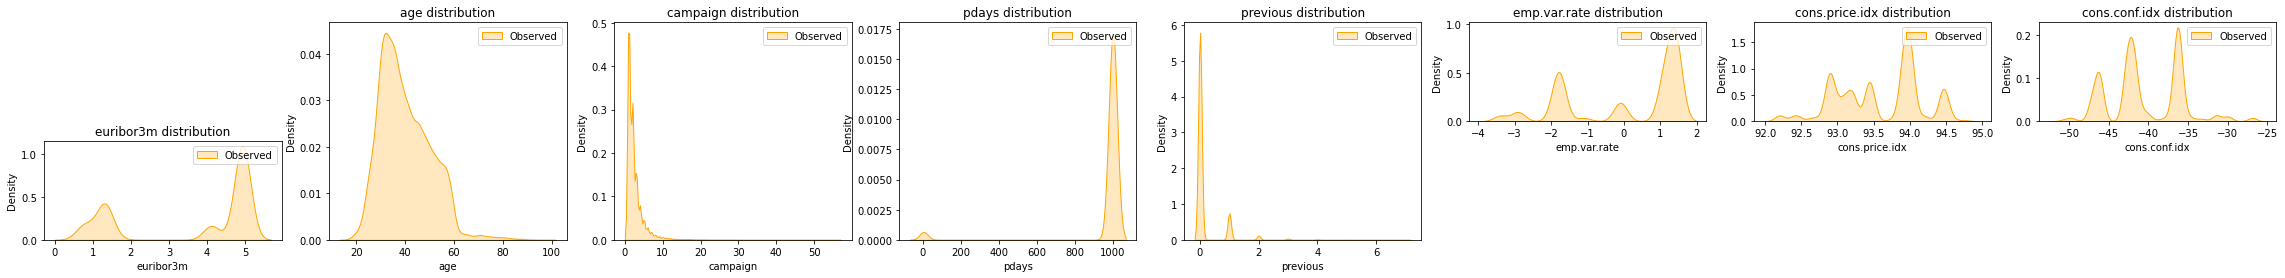

In [237]:
def pot(j, colkm):
    i  = int((4+j)/4) 
    j= j+1
    plt.subplot(i,8,j+1)
    plt.title(str(colkm)+" distribution")
    sns.kdeplot(df[colkm], shade="true", label="Observed", color = 'orange')
    plt.legend()
    plt.xlabel(colkm)

print(quan_field[0])
plt.figure(figsize=(40,4))
pot(0, quan_field[0])
pot(1, quan_field[1])
pot(2, quan_field[2])
pot(3, quan_field[3])
pot(4, quan_field[4])
pot(5, quan_field[5])
pot(6, quan_field[6])
pot(7, quan_field[7])
plt.show()


Podemos observar que existe una gran dispercion de los datos en todas las variables numericas, en especial en las variables emp.var.rate, cons.price.idx cos.conf.idx. 

### 6. Obtenga las correlaciones entre los datos de corte numérico

In [238]:
print(df.columns)
df.corr().style.background_gradient(cmap='coolwarm')

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
campaign,0.004594,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


### 7. Comente qué variable escogerán como variable dependiente Y y qué variables introducirán a su modelo de Regresión Logística como variables explicativas. Justifique su respuesta

Como varible dependiente escogere a y - ¿El cliente ha suscrito un depósito a plazo? (binario: 'sí', 'no').
Ya que justamente el objetivo de esta base de datos fue para realizar un modelo predictivo que permita predecir si un cliente realizo un deposito a plazo. Ademas las categorias Si y no son de igual importancia lo cual es un candidato exelente para la regrecion logistica.

### 8. Grabe el primer modelo de regresión y otórguele el alias de su preferencia. Comente los resultados del modelo, por ejemplo: 
- ¿Bajo cuántos datos fue obtenido el modelo? 
- ¿Cuál es su grado de ajuste?, 
- ¿Hay variables significativas? 
- ¿Cuáles son las variables no- significativas? Para esta última pregunta por favor aplique un contraste de hipótesis sobre los estimadores

In [239]:
from sklearn.preprocessing import LabelEncoder


In [240]:
labelencoder = LabelEncoder()
df[cat_field]=df[cat_field ].apply(LabelEncoder().fit_transform)

In [241]:
import statsmodels.api as sm
import statsmodels.formula.api as sms
df['emp_var_rate'] = df['emp.var.rate']
df['cons_price_idx'] = df['cons.price.idx']
df['cons_conf_idx'] = df['cons.conf.idx']
print()
regresion = sms.logit(" y ~ age + job + marital + education +  housing+\
                loan + contact + month + day_of_week + campaign + pdays + previous + poutcome + emp_var_rate + cons_price_idx + cons_conf_idx", data=df)
results = regresion.fit()
print(results.summary())



Optimization terminated successfully.
         Current function value: 0.280979
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41171
Method:                           MLE   Df Model:                           16
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.2018
Time:                        00:32:32   Log-Likelihood:                -11573.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -122.5153      4.306    -28.449      0.000    -130.956    -114.075
age             

Mediante la prueba  P>|z| vemos que existen varios campos cuyos valores son mayores a 0.05. Procedemos a retirarlos ya que bajo esta prueba no son significativos.


In [242]:
regresion2 = sms.logit(" y ~ age +  marital + education +  \
                 contact + month + day_of_week + campaign + pdays + previous + poutcome + emp_var_rate + cons_price_idx + cons_conf_idx", data=df)
results2 = regresion2.fit()
print(results2.summary())

Optimization terminated successfully.
         Current function value: 0.281005
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41174
Method:                           MLE   Df Model:                           13
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.2018
Time:                        00:32:32   Log-Likelihood:                -11574.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -122.6822      4.305    -28.498      0.000    -131.120    -114.245
age              

- ¿Bajo cuantos datos fue obtenido el modelo?

No retiramos ninguna fila de la base de datos, por lo tanto se utilizo todos los registros retirando aquellas variables no significativas.


- ¿Cuál es su grado de ajuste? 

El radio de ajuste es de 0.125 lo cual indica que no es un buen modelo.

- hay variables significativas

Si exsiten variables significativas como es el caso de age, marital, education, etc. Las podemos usar aplicando en P value ya que en estas variables podemos rechazar la hipotesis nula.

H0 : β1 = β2 = . . . = βn = 0.

- ¿Cuáles son las variables no- significativas? Para esta última pregunta por favor aplique un contraste de hipótesis sobre los estimadores

Mediante la prueba  P>|z| vemos que existen varios campos cuyos valores son mayores a 0.05. Se precedio a retirarlos ya que bajo esta prueba no son significativos.

### 9. Verifique los supuestos de la Regresión Logística. Comente cada uno de ellos

1. Variable dependiente categórica binaria

Efectivamente la variable escogida si es binaria ( yes , no) en nuestro caso (0 ,1)

2. Relación lineal entre el logaritmo natural de odds y la variable continua

3. No colinealidad perfecta entre las covariables 

Podemos apreciar que si existe variables cuyo VIP es mayor a 5. Pero la mayoria de variables son menores a 5, podrimos asumir que no tiene problemas de multicolienaridd

In [243]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_predictoras= ["age" , "marital" , "education" ,  "contact" , "day_of_week" , "campaign",  "pdays" , "previous" , "poutcome" , "emp_var_rate" , "cons_price_idx" ,"cons_conf_idx"]
vif_data = pd.DataFrame()
vif_data["feature"] = df[var_predictoras].columns
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df[var_predictoras].values, i) for i in range(len(df[var_predictoras].columns))]

print(vif_data)



           feature         VIF
0              age   19.221399
1          marital    5.642071
2        education    4.270534
3          contact    2.007561
4      day_of_week    3.076740
5         campaign    1.912405
6            pdays  165.417251
7         previous    5.699100
8         poutcome   33.619709
9     emp_var_rate    1.463975
10  cons_price_idx  480.948084
11   cons_conf_idx   91.632607


### 10. Obtenga el modelo de Regresión Logística definitivo, argumente su respuesta e interprete los coeficientes

La regresión logística definitiva será la almacenada en results2. Ya que tras eliminar algunos valores con la prueba P>|z|  el  Pseudo R-squ, aumentó ligeramente. A pesar que los valores de cons_price_idx y cons_conf_idx son muy altos el VIF. Mantuvimos estos campos ya que contribuyen a la precisión del sistema.

<AxesSubplot:xlabel='previous', ylabel='y'>

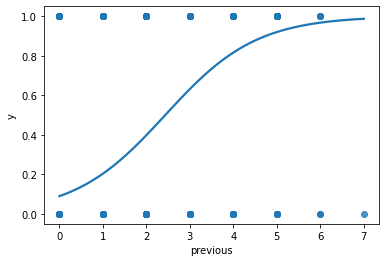

In [244]:
y_pred = results2.predict()
sns.regplot(x=df.previous, y=df.y, data=df, logistic=True, ci=None)

### Bonus: Grafique a los valores predicho del modelo vs los valores reales
- ¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respusta.


0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64
0        0.036427
1        0.040977
2        0.037711
3        0.035396
4        0.040808
           ...   
41183    0.447100
41184    0.418455
41185    0.428153
41186    0.416353
41187    0.308516
Length: 41188, dtype: float64


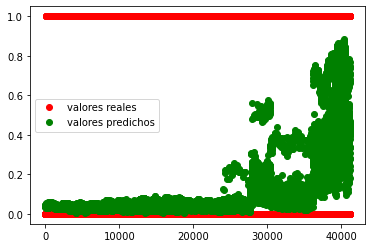

In [245]:
y_pred=results2.predict(df)
y= df['y']
print(y)
print(y_pred)
x= range(len(y))
plt.plot(x, y, 'ro',label = "valores reales")
plt.plot(x, y_pred, 'go', label = "valores predichos")
plt.legend()
plt.show()

In [246]:
t = results2.pred_table()
print(t)
print("Accuracy:",np.diag(t).sum()/t.sum())

[[36073.   475.]
 [ 3632.  1008.]]
Accuracy: 0.9002864912110323


Con los resultados obtenidos por la matriz de confucion se puede concluir que el modelo es aceptable. El porcentaje de aciertos es del 90%. Esto nos dice que del total de observaciones en el modelo, el modelo predijo correctamente la clase correspondiente el 90 % de las veces. Obteniendo un total de 36073+1008  (Tp+Tn) valores predichos correctamente. 